# Part 1
### Pouya Farivar | 99106511

Lets start by loading the data and doing some visualizations:

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
companies = pd.read_csv('companies.csv')
entities = pd.read_csv('entities.csv')
tweets = pd.read_csv('tweets.csv')
users = pd.read_csv('users.csv', on_bad_lines='skip')

In [171]:
# creating a column of raw date's
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%a %b %d %H:%M:%S %z %Y')
tweets['date'] = tweets['created_at'].dt.date

This part is for the statistics on the most tweeted stocks and the classification of the tweet to stock ratio.

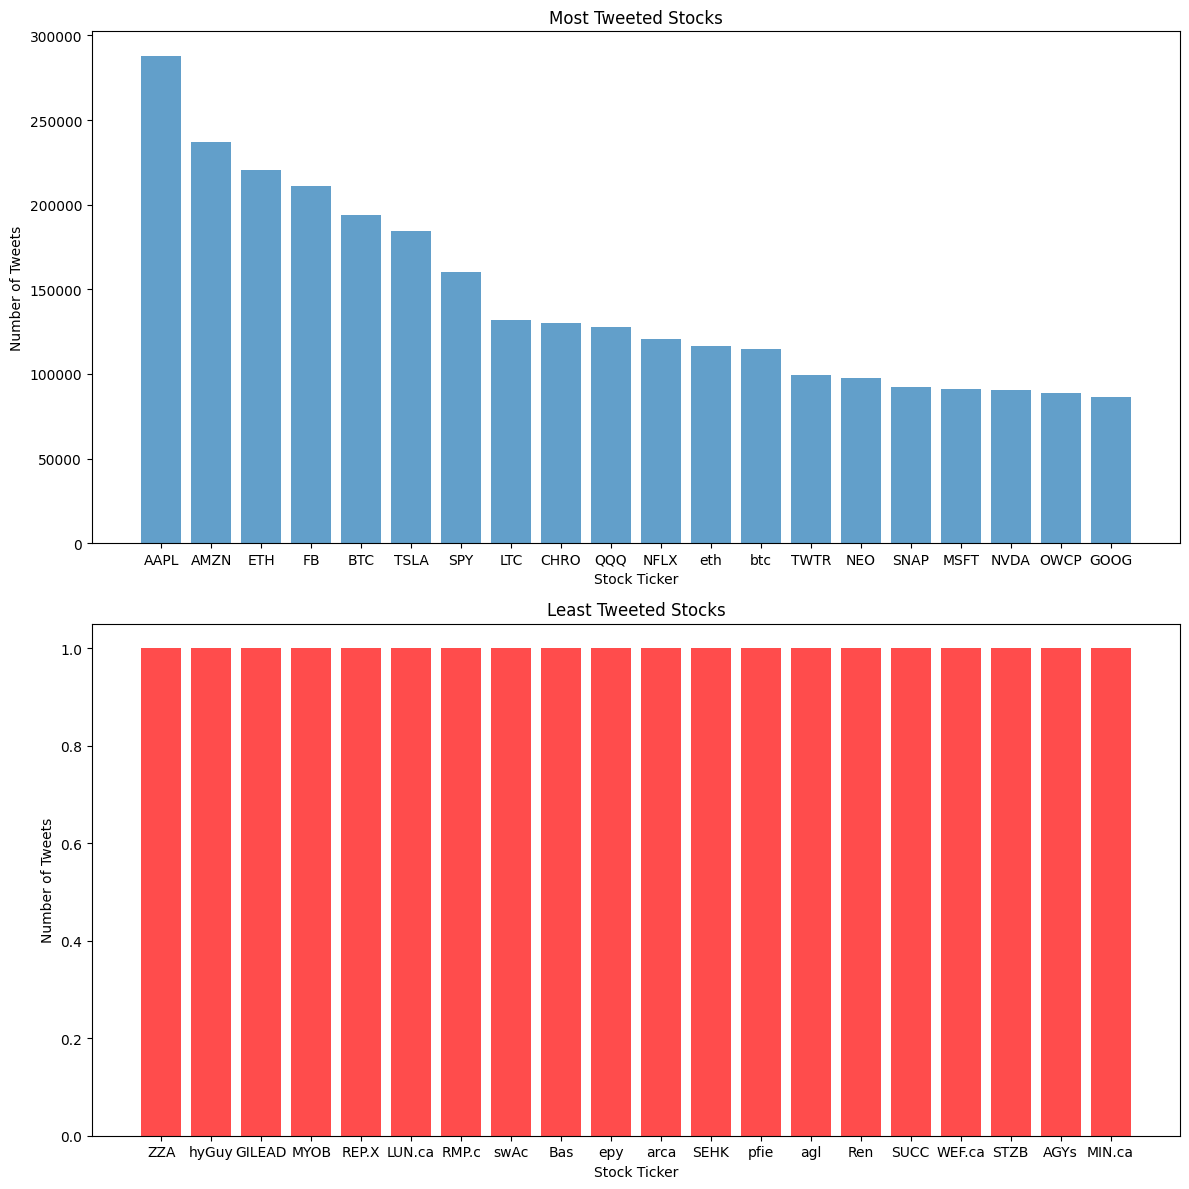

In [165]:
cashtags = entities[entities['entity_type']=='symbol']['text'].values
ticker_counts = pd.Series(cashtags).value_counts().reset_index()
ticker_counts.columns = ['ticker', 'counts']

# Segmentation of the companies based on the number of tweets
most_tweeted = ticker_counts.nlargest(20, 'counts')
least_tweeted = ticker_counts.nsmallest(20, 'counts')

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

axes[0].bar(most_tweeted['ticker'], most_tweeted['counts'], alpha=0.7)
axes[0].set_title('Most Tweeted Stocks')
axes[0].set_xlabel('Stock Ticker')
axes[0].set_ylabel('Number of Tweets')

axes[1].bar(least_tweeted['ticker'], least_tweeted['counts'], color = 'red', alpha=0.7)
axes[1].set_title('Least Tweeted Stocks')
axes[1].set_xlabel('Stock Ticker')
axes[1].set_ylabel('Number of Tweets')

plt.tight_layout()
plt.show()

Is there a correlation between the number of tweets and the capitalization? NO

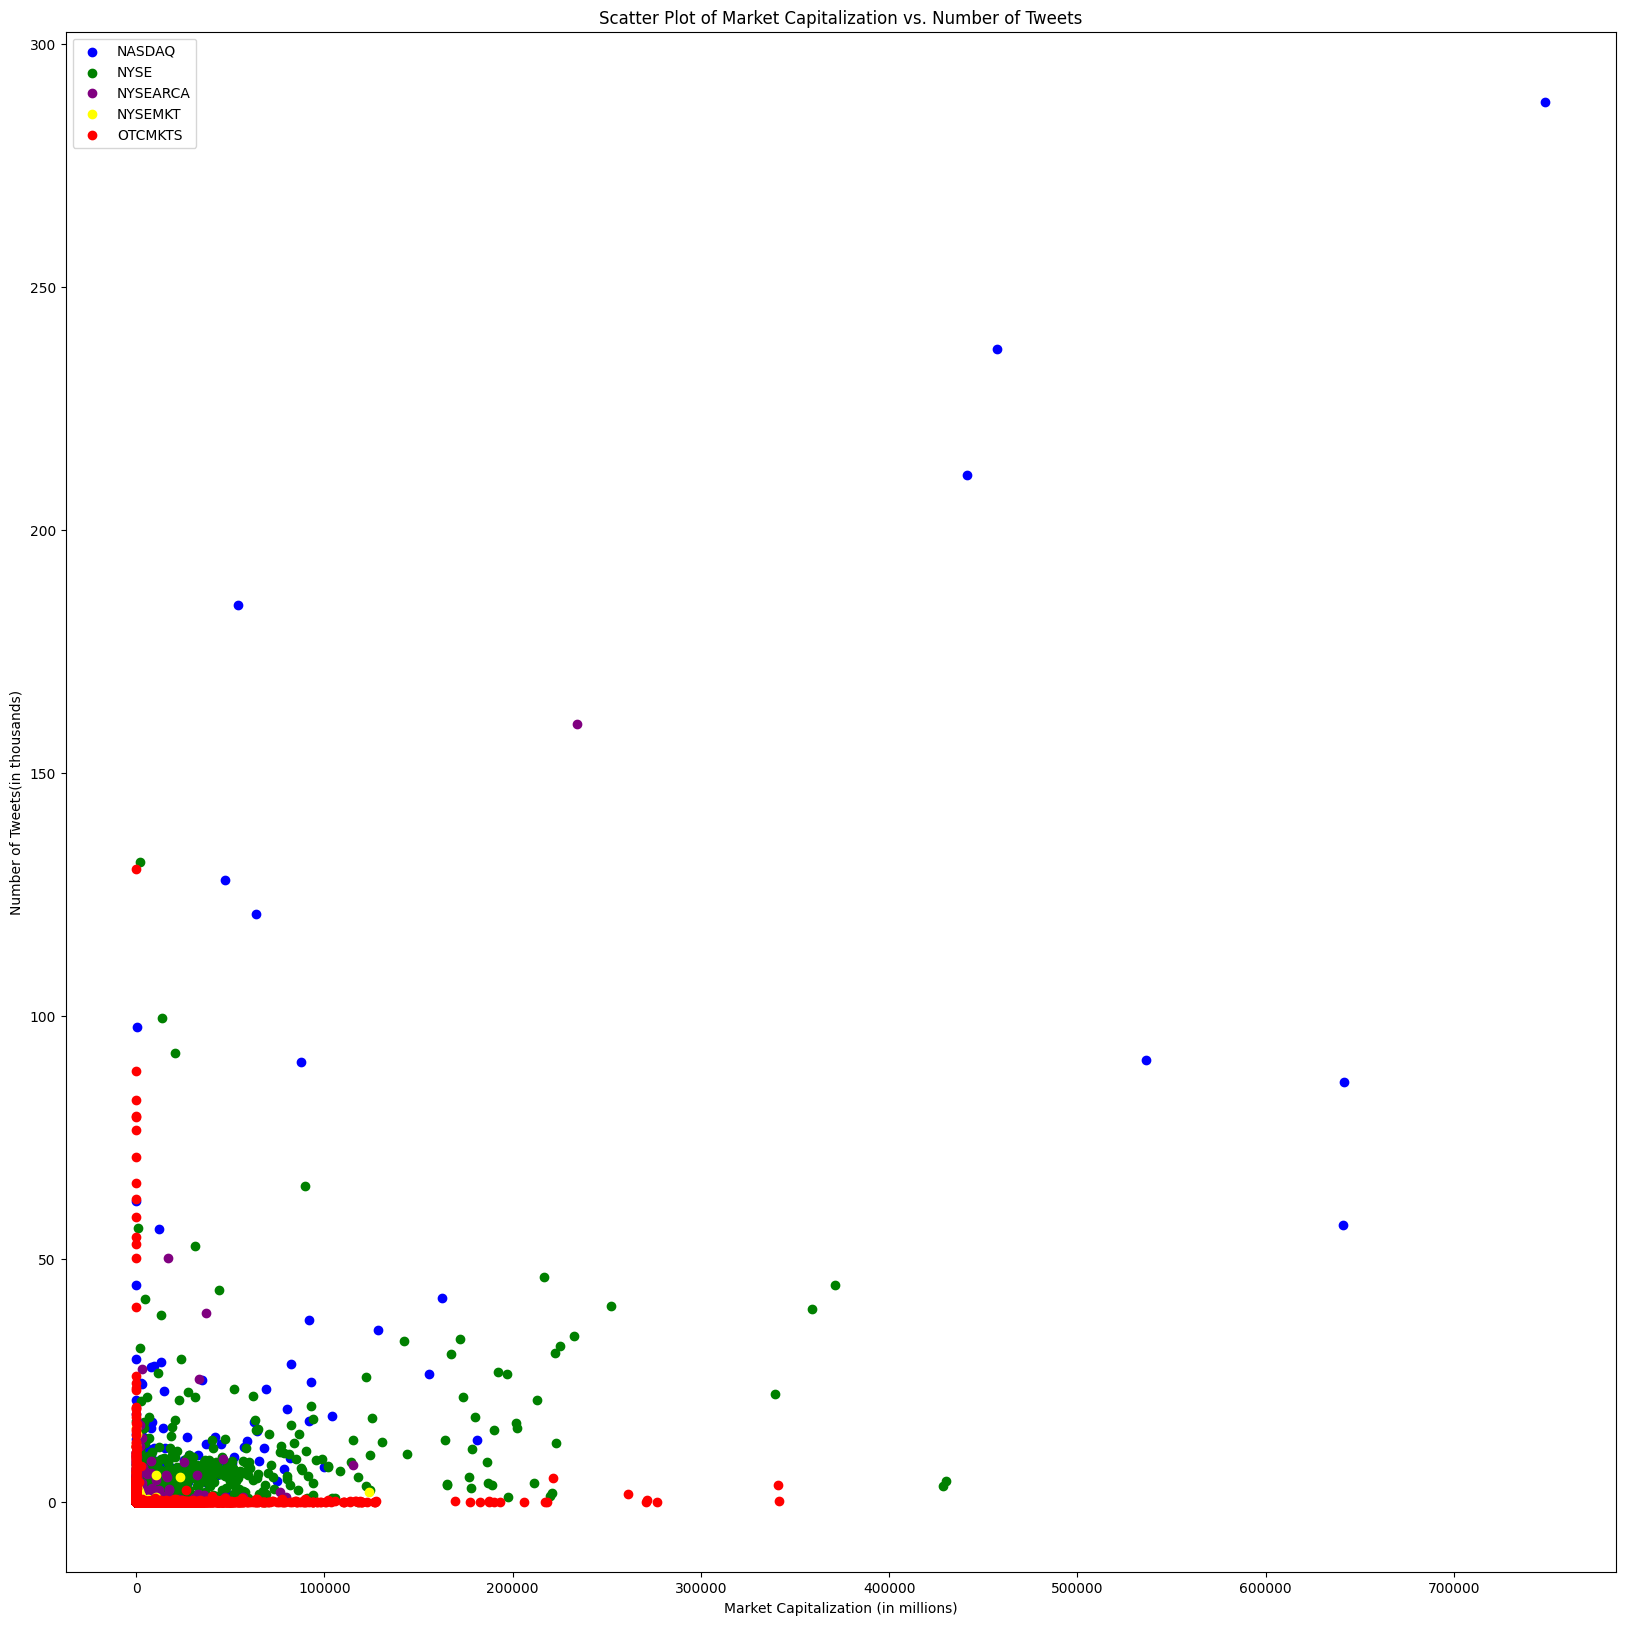

In [167]:
# Merging on stock ticker
merged_data = pd.merge(ticker_counts, companies, on='ticker')

fig, ax = plt.subplots(figsize=(20, 20))
exchange_colors = {'NASDAQ': 'blue', 'NYSE': 'green', 'OTCMKTS': 'red', 'NYSEARCA': 'purple', 'NYSEMKT': 'yellow'}

for exchange, group in merged_data.groupby('exchange'):
    ax.scatter(group['capitalization']/1e+6, group['counts']/1000, label=exchange, color=exchange_colors[exchange])

    ax.set_xlabel('Market Capitalization (in millions)')
ax.set_ylabel('Number of Tweets(in thousands)')
ax.set_title('Scatter Plot of Market Capitalization vs. Number of Tweets')
ax.legend()
plt.show()

Distribution of companies per number of tweets.

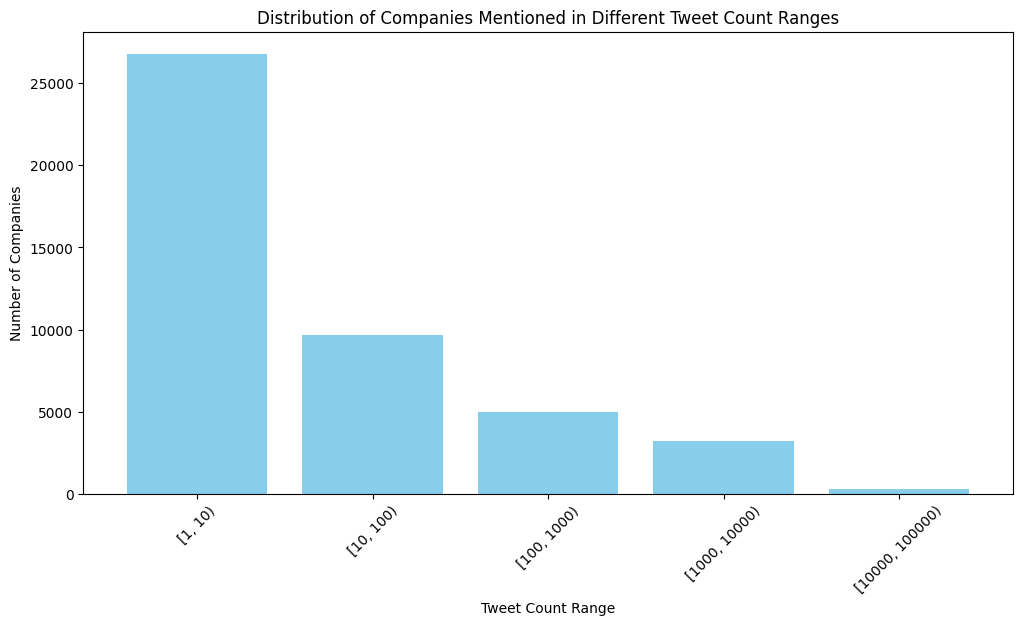

In [168]:
company_mentions = entities_symbol['text'].value_counts()

# creating ranges 
tweet_ranges = [10**i for i in range(0, 6)]
company_counts = pd.cut(company_mentions, bins=tweet_ranges, include_lowest=True, right=False).value_counts(sort=False)

plt.figure(figsize=(12, 6))
company_counts.plot(kind='bar', color='skyblue', width=0.8)
plt.xlabel('Tweet Count Range')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies Mentioned in Different Tweet Count Ranges')
plt.xticks(rotation=45)
plt.show()

Number of tweets over time for different tickers. BTC as nomenie for the crypto market, SPY and QQQ for the main market on the safe and risky side. BABA for a nominie on how chinese stocks would preform and PFE for the biomedical industry.

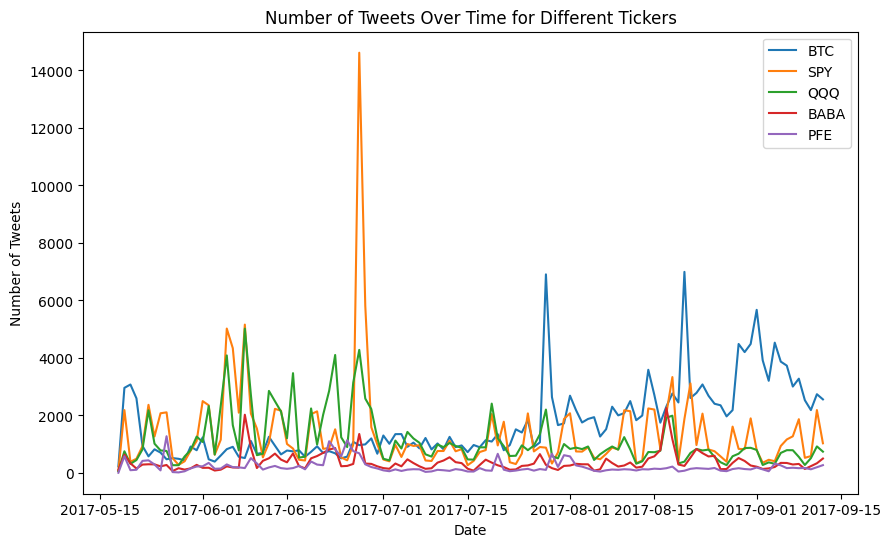

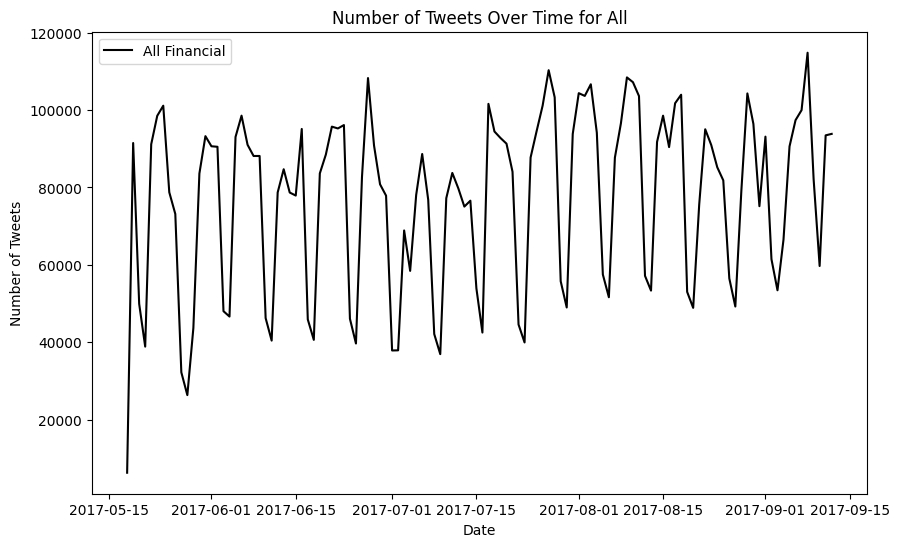

In [172]:
# getting the time series of tweets for each ticker
tickers = ['BTC', 'SPY', 'QQQ', 'BABA', 'PFE']
ticker_tweets_ids = [entities_symbol[entities_symbol['text'].str.contains(ticker, na=False)]['tweet_id'] for ticker in tickers]
ticker_tweets = [tweets[tweets['id'].isin(ids)] for ids in ticker_tweets_ids]
ticker_tweet_counts = [ticker_df.groupby('date').size() for ticker_df in ticker_tweets]
all_financial_tweet_counts = tweets.groupby('date').size()

plt.figure(figsize=(10, 6))
for i, ticker in enumerate(tickers):
    plt.plot(ticker_tweet_counts[i].index, ticker_tweet_counts[i].values, label=ticker)

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time for Different Tickers')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(all_financial_tweet_counts.index, all_financial_tweet_counts.values, label='All Financial', color='black')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time for All')
plt.legend()
plt.show()

Overall distributions of the tweets

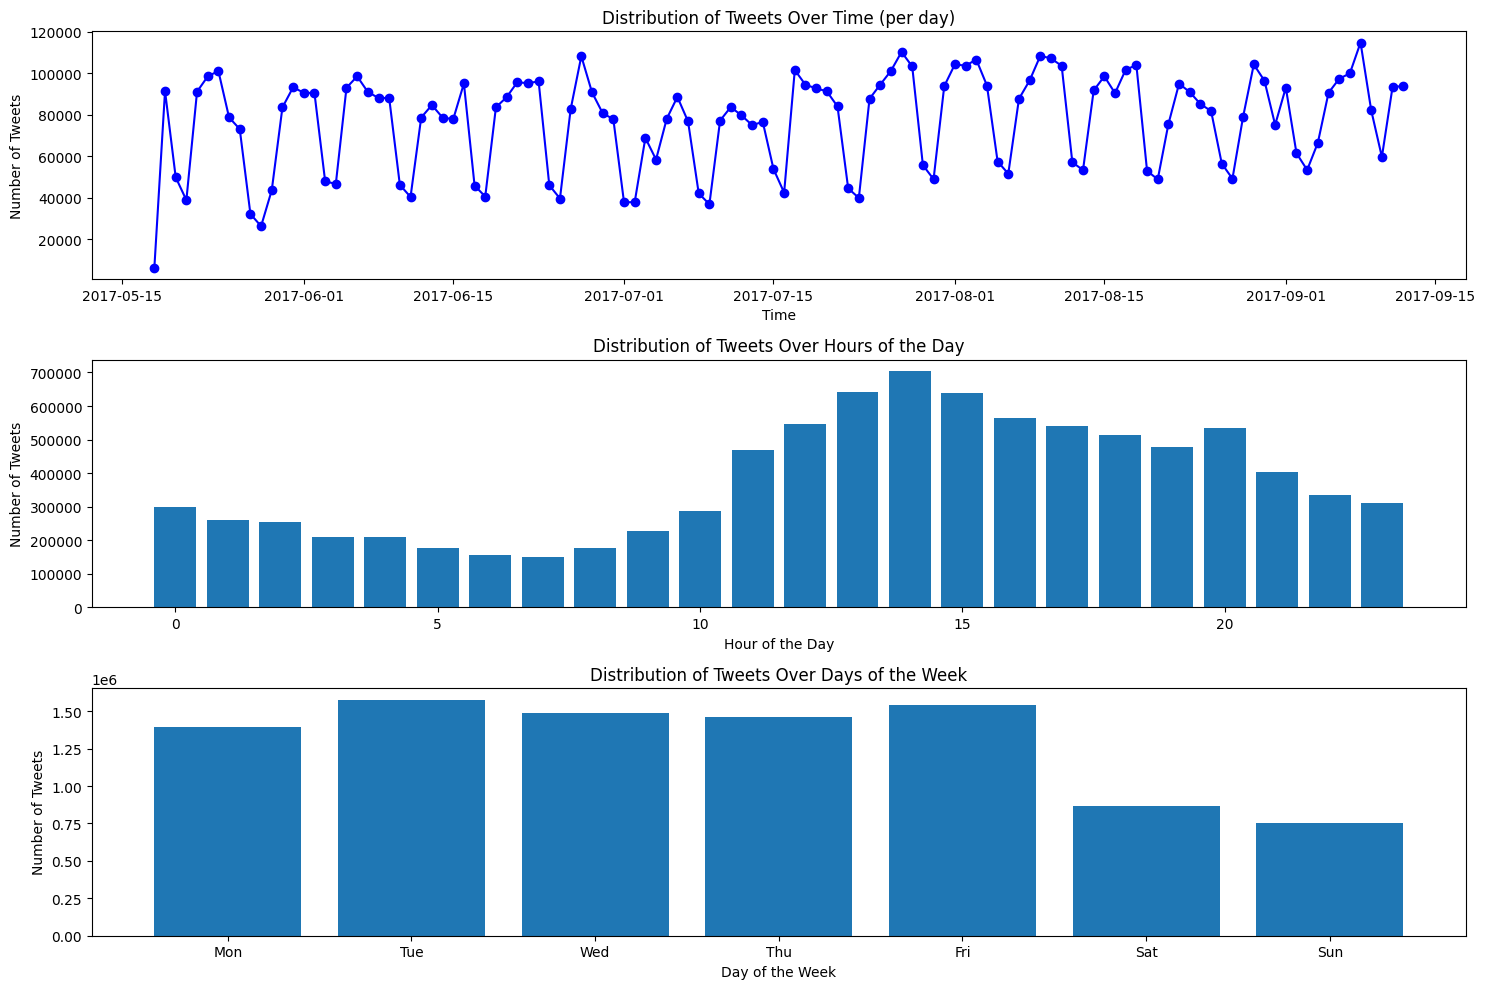

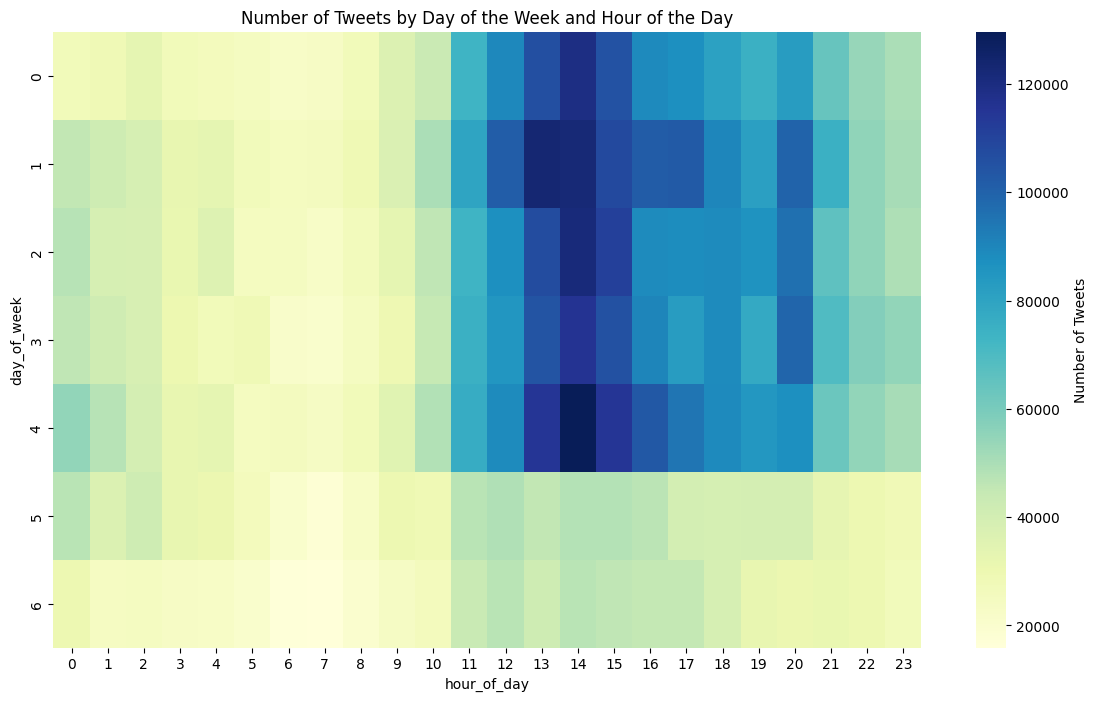

In [175]:
import seaborn as sns

# gettin hour of day and day of week data
tweets['hour_of_day'] = tweets['created_at'].dt.hour
tweets['day_of_week'] = tweets['created_at'].dt.dayofweek

fig, axes = plt.subplots(3, 1, figsize=(15, 10))
time_counts = tweets.groupby(tweets['created_at'].dt.date).size()
axes[0].plot(time_counts.index, time_counts.values, marker='o', linestyle='-', color='b')
axes[0].set_title('Distribution of Tweets Over Time (per day)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Number of Tweets')

hour_counts = tweets.groupby('hour_of_day').size()
axes[1].bar(hour_counts.index, hour_counts.values)
axes[1].set_title('Distribution of Tweets Over Hours of the Day')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Tweets')

day_counts = tweets.groupby('day_of_week').size()
axes[2].bar(day_counts.index, day_counts.values)
axes[2].set_title('Distribution of Tweets Over Days of the Week')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Tweets')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

#heat map
tweets_counts = tweets.groupby(['day_of_week', 'hour_of_day']).size().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(tweets_counts, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Number of Tweets'})
plt.title('Number of Tweets by Day of the Week and Hour of the Day')
plt.show()

You can see that the most activity is on weekdays from 10 Am to 15 Pm which coinsides with the market open times.

Comparison of two tickers SPY and BTC.
There are good reasons for choosing these two. The two are belived to move in tandem and historicaly it is shown that BTC acts more like a risk asset than a safe heaven asset like GLD.

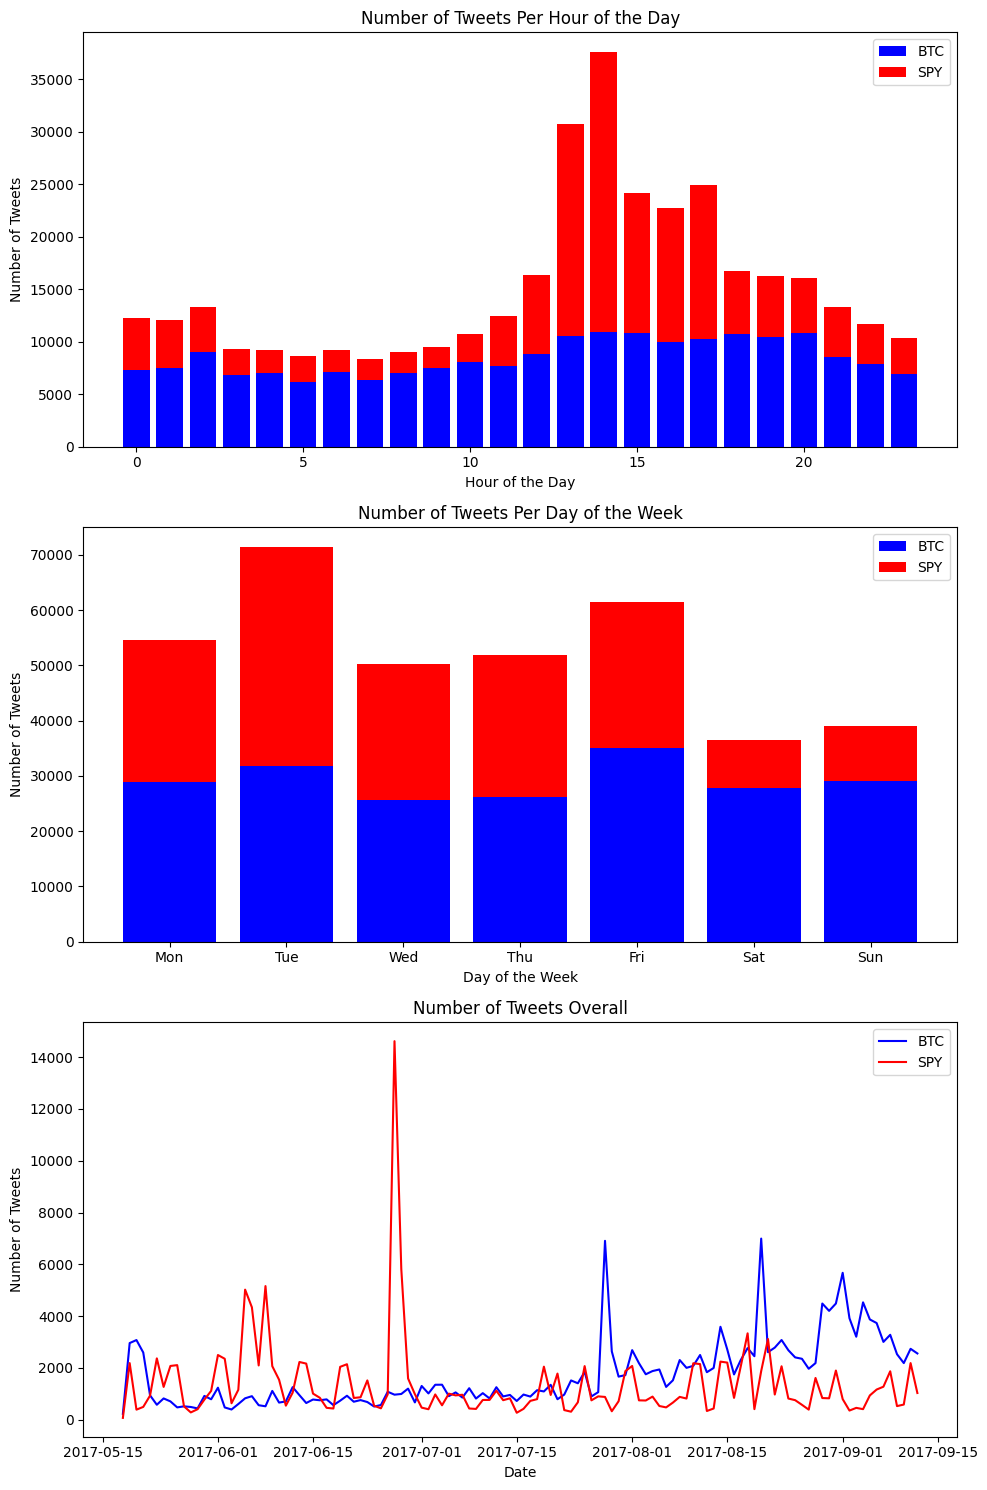

In [176]:
# getting the timeseries data for each BTC and SPY
entities_symbol = entities[entities['entity_type']=='symbol']
btc_tweets_ids = entities_symbol[entities_symbol['text'].str.contains('BTC' , na = False)]['tweet_id']
spy_tweets_ids = entities_symbol[entities_symbol['text'].str.contains('SPY', na = False)]['tweet_id']

btc_tweets = tweets[tweets['id'].isin(btc_tweets_ids)]
spy_tweets = tweets[tweets['id'].isin(spy_tweets_ids)]


fig, axes = plt.subplots(3, 1, figsize=(10, 15))
btc_hourly = btc_tweets.groupby('hour_of_day').size()
spy_hourly = spy_tweets.groupby('hour_of_day').size()
axes[0].bar(btc_hourly.index, btc_hourly.values, color='b', label='BTC')
axes[0].bar(spy_hourly.index, spy_hourly.values, bottom=appl_hourly.values, color='r', label='SPY')
axes[0].set_title('Number of Tweets Per Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Tweets')
axes[0].legend()

btc_day = btc_tweets.groupby('day_of_week').size()
spy_day = spy_tweets.groupby('day_of_week').size()
axes[1].bar(btc_day.index, btc_day.values, color='b', label='BTC')
axes[1].bar(spy_day.index, spy_day.values, bottom=appl_day.values, color='r', label='SPY')
axes[1].set_title('Number of Tweets Per Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Tweets')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1].legend()

btc_overall = btc_tweets.groupby(btc_tweets['created_at'].dt.date).size()
spy_overall = spy_tweets.groupby(spy_tweets['created_at'].dt.date).size()
axes[2].plot(btc_overall.index, btc_overall.values, color='b', label='BTC')
axes[2].plot(spy_overall.index, spy_overall.values, color='r', label='SPY')
axes[2].set_title('Number of Tweets Overall')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of Tweets')
axes[2].legend()

plt.tight_layout()
plt.show()

The most important event is the june 2017 event ofshooting of Rep. Steve Scalise and three others at a Congressional Republican baseball practice, which caused massive security issues and panics accros the american economy.

Doing the same analysis for retweets

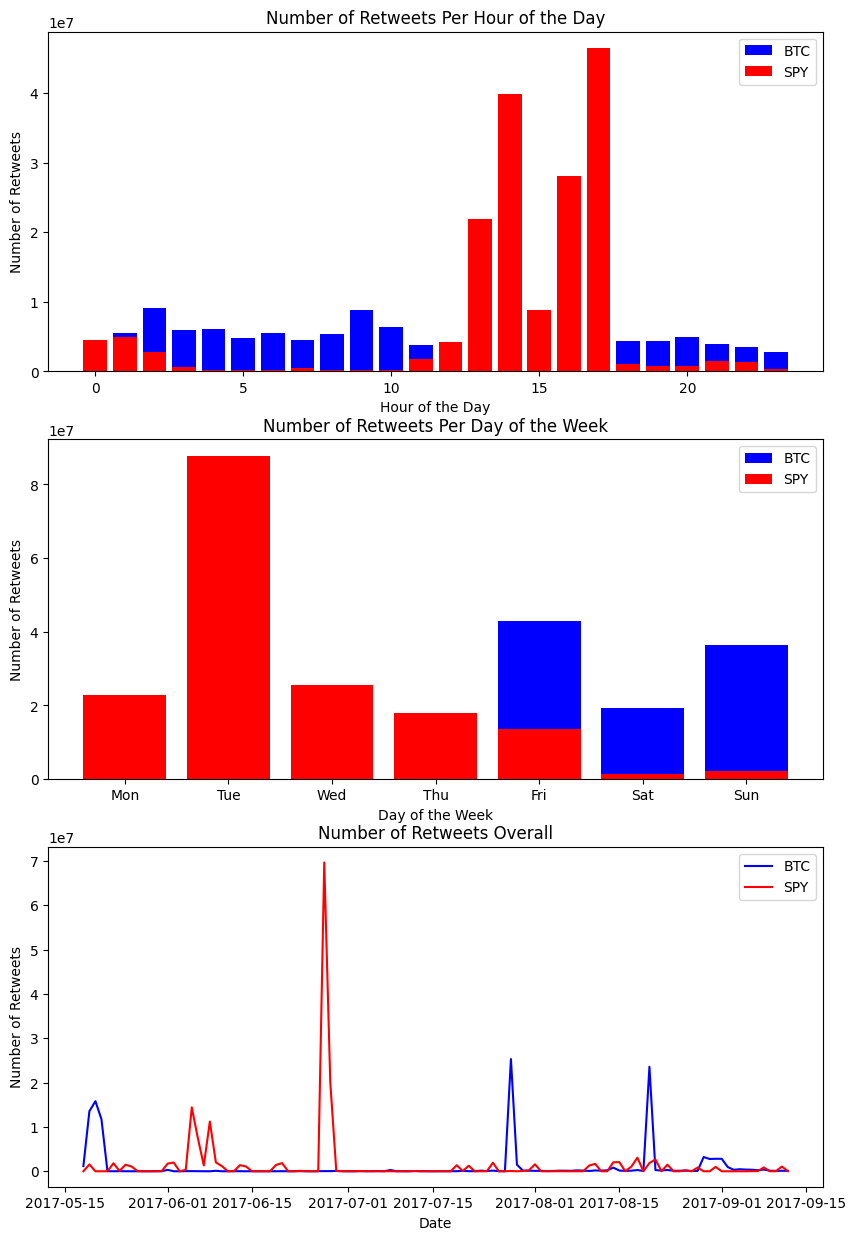

In [177]:
# calculating the retweets
retweet_count = tweets['retweeted_status_id'].value_counts()
tweets['retweet_count'] = tweets['retweeted_status_id'].map(retweet_count).fillna(0).astype(int)
tweets['retweet_count'] =  tweets['retweet_count'].replace(6885737,0)
# getting each of BTC and SPY numbers
btc_tweets = tweets[tweets['id'].isin(btc_tweets_ids)]
spy_tweets = tweets[tweets['id'].isin(spy_tweets_ids)]

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

btc_hourly = btc_tweets.groupby('hour_of_day')['retweet_count'].sum()
spy_hourly = spy_tweets.groupby('hour_of_day')['retweet_count'].sum()
axes[0].bar(btc_hourly.index, btc_hourly.values, color='b', label='BTC')
axes[0].bar(spy_hourly.index, spy_hourly.values, color='r', label='SPY')
axes[0].set_title('Number of Retweets Per Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Retweets')
axes[0].legend()

btc_day = btc_tweets.groupby('day_of_week')['retweet_count'].sum()
spy_day = spy_tweets.groupby('day_of_week')['retweet_count'].sum()
axes[1].bar(btc_day.index, btc_day.values, color='b', label='BTC')
axes[1].bar(spy_day.index, spy_day.values, color='r', label='SPY')
axes[1].set_title('Number of Retweets Per Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Retweets')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1].legend()

btc_overall = btc_tweets.groupby('date')['retweet_count'].sum()
spy_overall = spy_tweets.groupby('date')['retweet_count'].sum()
axes[2].plot(btc_overall.index, btc_overall.values, linestyle='-', color='b', label='BTC')
axes[2].plot(spy_overall.index, spy_overall.values, linestyle='-', color='r', label='SPY')
axes[2].set_title('Number of Retweets Overall')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of Retweets')
axes[2].legend()

Here i have provided information on each exchange:

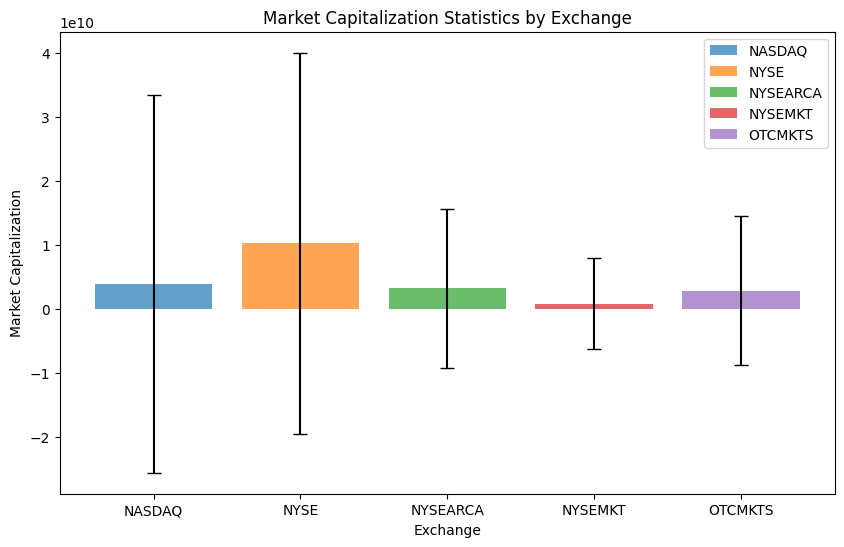

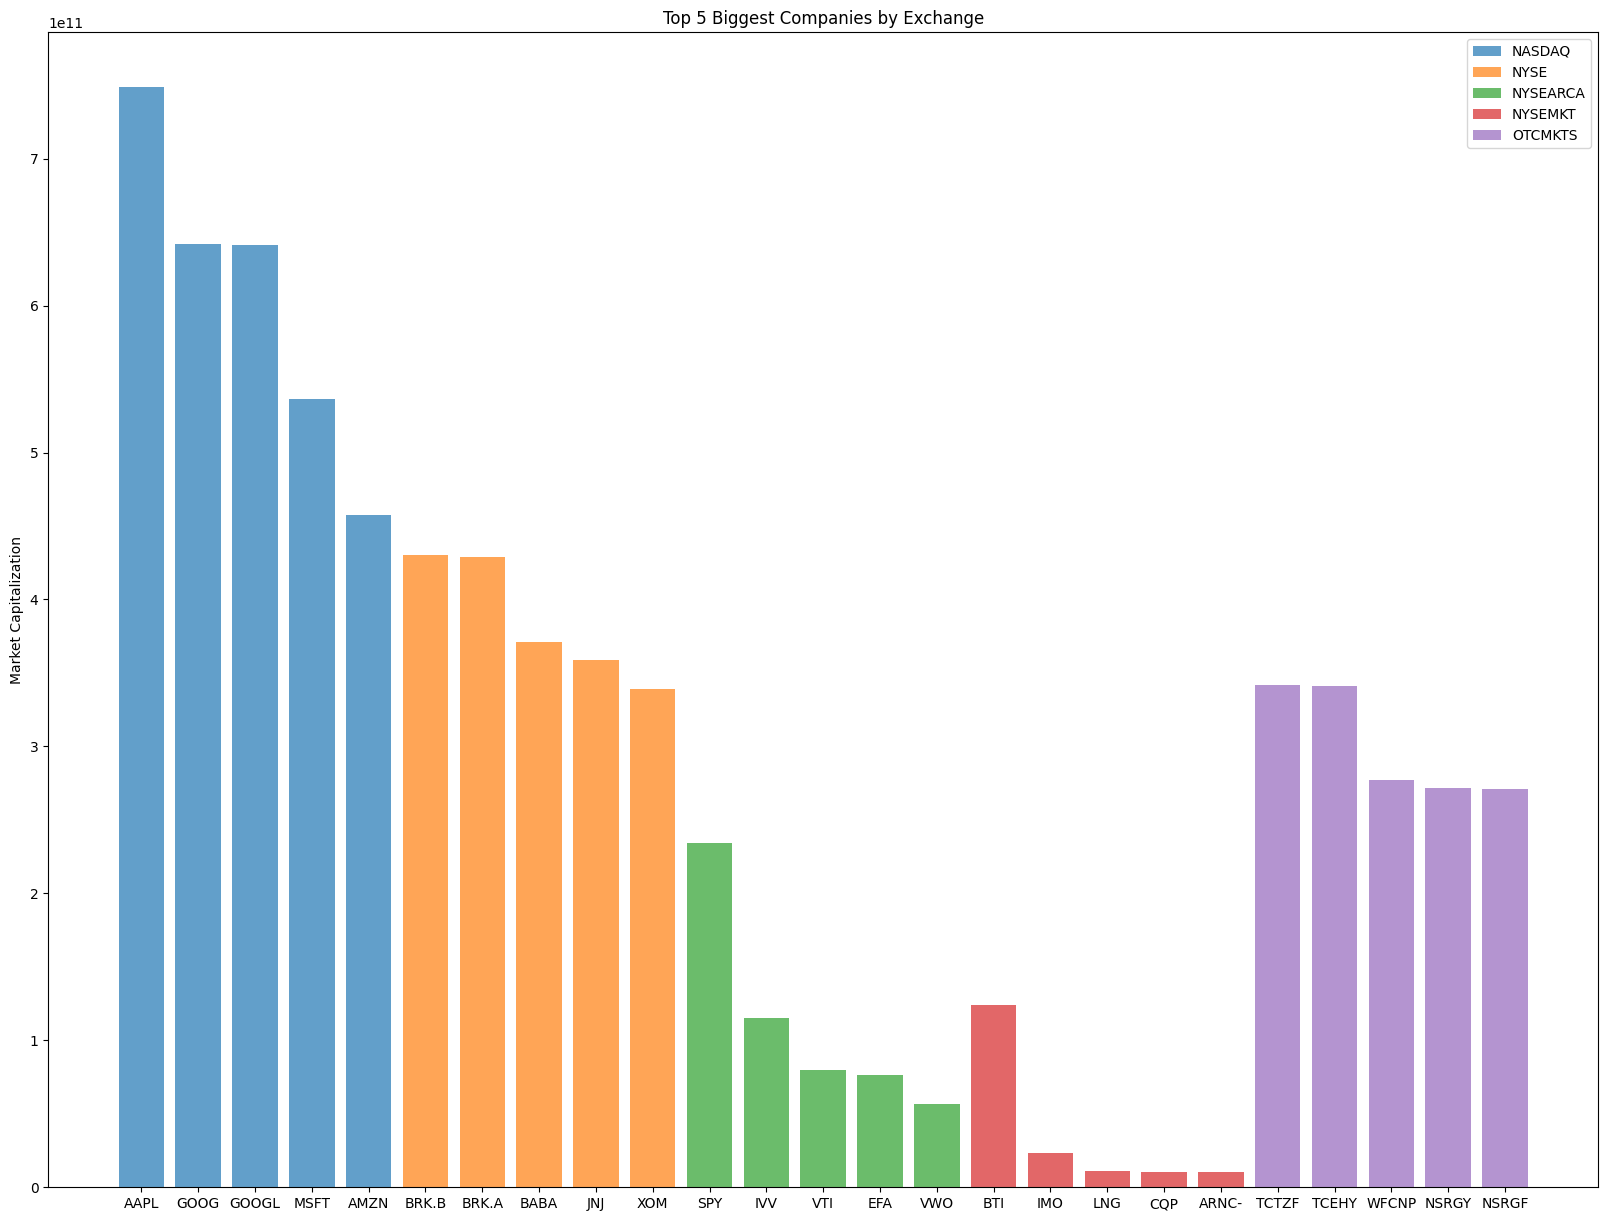

In [178]:
# grouping by exchanges
exchange_stats = companies.groupby('exchange')['capitalization'].agg(['min', 'max', 'mean', 'std'])

# biggest and smallest per exchange
biggest_companies = companies.loc[companies.groupby('exchange')['capitalization'].idxmax()]
smallest_companies = companies.loc[companies.groupby('exchange')['capitalization'].idxmin()]

fig, ax = plt.subplots(figsize=(10, 6))

for exchange in exchange_stats.index:
    stats = exchange_stats.loc[exchange]
    ax.bar(exchange, stats['mean'], yerr=stats['std'], label=exchange, capsize=5, alpha=0.7)

ax.set_title('Market Capitalization Statistics by Exchange')
ax.set_xlabel('Exchange')
ax.set_ylabel('Market Capitalization')
ax.legend()

plt.show()

companies_sort = companies.sort_values(by='capitalization', ascending=False)

# top and bottom 5
top5_by_exchange = companies_sort.groupby('exchange').head(5)
bottom5_by_exchange = companies_sort.groupby('exchange').tail(5)

fig, axes = plt.subplots(figsize=(20, 15), sharex=True)

for exchange, group in top5_by_exchange.groupby('exchange'):
    axes.bar(group['ticker'], group['capitalization'], label=exchange, alpha=0.7)

axes.set_title('Top 5 Biggest Companies by Exchange')
axes.set_ylabel('Market Capitalization')
axes.legend()

Nothing much to say but it looks clean as hell.

SPY and BTC are one of the most co-tweeted dues. here I present a visualization of that:

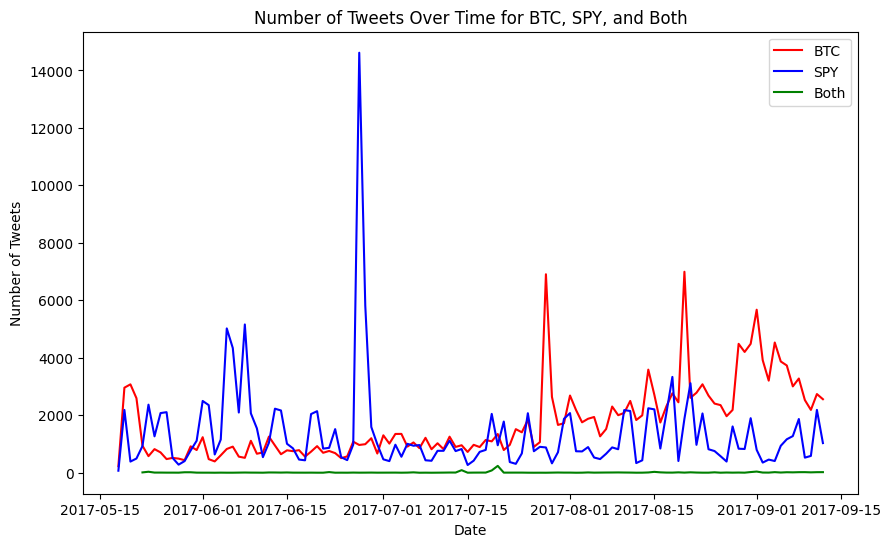

In [179]:
# getting the counts again
btc_tweet_count = btc_tweets.groupby('date').size()
spy_tweet_count = spy_tweets.groupby('date').size()

# co-tweeted counts
both_tweets_ids = pd.merge(btc_tweets_ids, spy_tweets_ids, how='inner', on='tweet_id')
both_tweets = tweets[tweets['id'].isin(both_tweets_ids['tweet_id'])]
both_tweet_count = both_tweets.groupby('date').size()

plt.figure(figsize=(10, 6))
plt.plot(btc_tweet_count.index, btc_tweet_count.values, label='BTC', color ='red')
plt.plot(spy_tweet_count.index, spy_tweet_count.values, label='SPY', color = 'blue')
plt.plot(both_tweet_count.index, both_tweet_count.values, label='Both', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Over Time for BTC, SPY, and Both')
plt.legend()
plt.show()

This may look low and its because of the sheer amount of tweets each individual has. There are cotweeted ones and they seem to ocour when the frequency of posting for both cashtags are similar.